In [2]:
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from scipy.stats import sem, norm, t, bootstrap

# 1) Analytic Approach

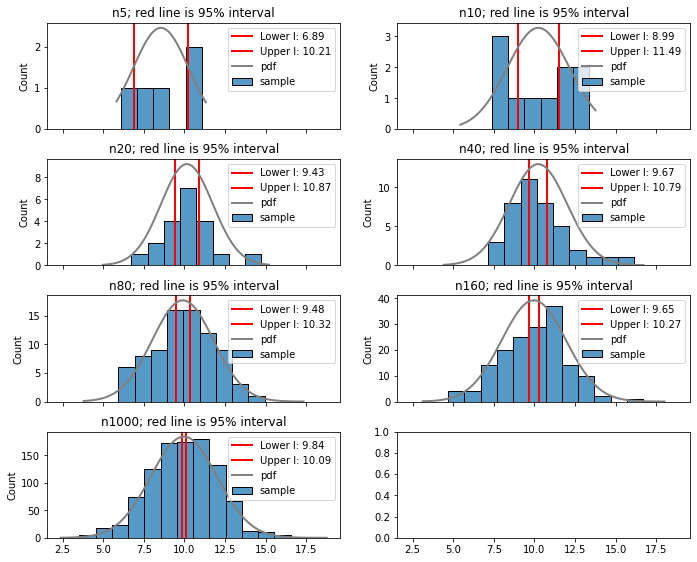

In [22]:
mu = 10
sigma = 2
n = [ 5, 10, 20, 40, 80, 160, 1000 ]
# confidence = ( 1 - .95 ) / 2
confidence = [ (1-.95)/2, 1 - (1-.95)/2 ]
# confidence = [.05, .95 ]

# set subplots
fig, axs = plt.subplots(nrows=4, ncols=2, sharex=True)
fig.set_size_inches( 10, 8 )
fig.tight_layout(pad=2.0)

# Get random sample
rnd_sampling = dict( n5=None, n10=None, n20=None, n40=None, n80=None, n160=None, n1000=None )
for val, key, ax in zip( n, rnd_sampling.keys(), axs.reshape(-1) ):
    rnd_sampling[ key ] = { 'sample': np.random.normal( mu, sigma, val ) }
    rnd_sampling[ key ].update( { 'x_bar': np.mean( rnd_sampling[ key ][ 'sample' ] ),
                            's': np.std( rnd_sampling[ key ][ 'sample' ] ),
                            'SEM': sem( rnd_sampling[ key ][ 'sample' ] ) } )
    rnd_sampling[ key ].update( { 'norm_ppf': norm.ppf( confidence, loc=rnd_sampling[ key ][ 'x_bar' ], 
                                                  scale=rnd_sampling[ key ][ 's' ] ) } )
                           
    # Compute the confidence Interval
    CI = rnd_sampling[key]['x_bar'] + rnd_sampling[key]['SEM']*norm.ppf(confidence)
        
    # Create histogram and plot the 95% Confidence interval in red
    sbn.histplot( data=rnd_sampling[ key ]['sample'], kde=False, binwidth=1, ax=ax, label='sample' )
    ax.axvline( x=CI[ 0 ], color='red',linewidth=2, label='Lower I: %2.2f' % CI[0] )
    ax.axvline( x=CI[ 1 ], color='red',linewidth=2, label='Upper I: %2.2f' % CI[1] )
    norm_ppf = rnd_sampling[ key ][ 'norm_ppf' ]
    ax.set_title(f'{key}; red line is 95% interval')
    
    # Add Normal Distribution to overlay
    x0, x1 = ax.get_xlim()
    x_pdf = np.linspace(x0, x1, 100)
    y_pdf = norm.pdf(x_pdf, loc=rnd_sampling[ key ][ 'x_bar' ], scale=rnd_sampling[ key ][ 's' ] ) * 5 * np.max( ax.get_ylim() ) 
    ax.plot(x_pdf, y_pdf, 'gray', lw=2, label='pdf')                                                   
    ax.legend(loc='upper right')
    

# 2) Simple Analytic Approach with small sample

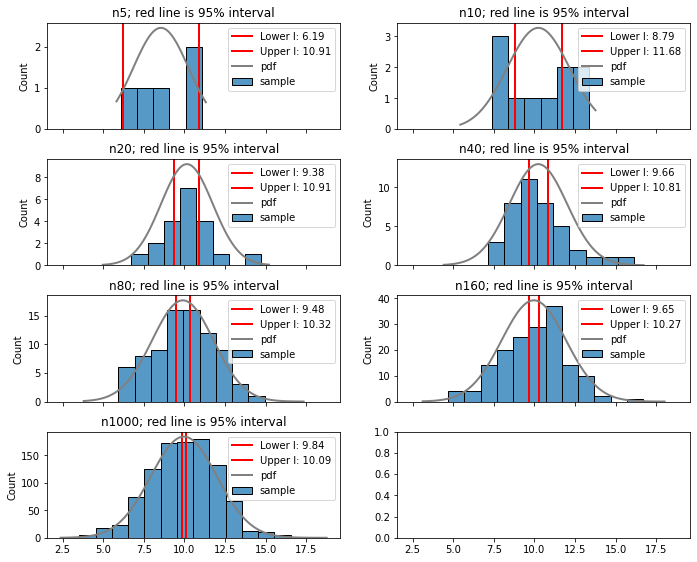

In [23]:
# set subplots
fig, axs = plt.subplots( nrows=4, ncols=2, sharex=True )
fig.set_size_inches( 10, 8 )
fig.tight_layout( pad=2.0 )

# Iterate to create histograms.
for val, key, ax in zip( n, rnd_sampling.keys(), axs.reshape( -1 ) ):
    
    # Find Confidence Interval from T-Distribution
    df = len( rnd_sampling[ key ][ 'sample' ] ) - 1
    rnd_sampling[ key ].update( { 't_ppf': t.ppf( confidence, df=df, loc=rnd_sampling[ key ][ 'x_bar' ],
                                                  scale=rnd_sampling[ key ][ 's' ] ) } )
    
    
    # Compute the confidence Interval
    CI = rnd_sampling[key]['x_bar'] + rnd_sampling[key]['SEM']*t.ppf(confidence, df=df)
    
    # Create histogram and plot the 95% Confidence interval in red
    sbn.histplot( data=rnd_sampling[ key ]['sample'], kde=False, binwidth=1, ax=ax, label='sample' )
    ax.axvline(x=CI[0], color='red', linewidth=2, label='Lower I: %2.2f' % CI[0])
    ax.axvline(x=CI[1], color='red', linewidth=2, label='Upper I: %2.2f' % CI[1])
    ax.set_title(f'{key}; red line is 95% interval')
    
    # Add Normal Distribution to overlay
    x0, x1 = ax.get_xlim()
    x_pdf = np.linspace(x0, x1, 100)
    y_pdf = norm.pdf(x_pdf, loc=rnd_sampling[ key ][ 'x_bar' ], scale=rnd_sampling[ key ][ 's' ] ) * 5 * np.max( ax.get_ylim() ) 
    ax.plot(x_pdf, y_pdf, color='gray', lw=2, label='pdf')                                                   
    ax.legend(loc='upper right')
    

# 3) Bootstrapped Method

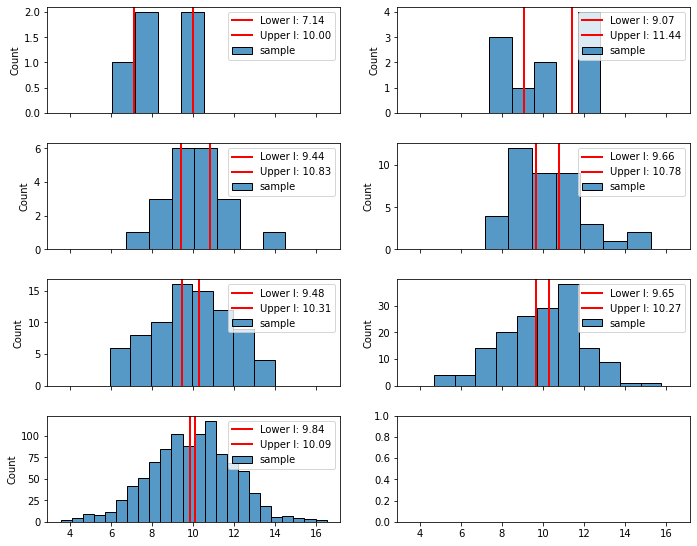

In [25]:
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, sharex=True)
fig.set_size_inches( 10, 8 )
fig.tight_layout( pad=2.0 )
axes.reshape(-1)

# Iterate through the different sample sizes and compute statistics
for keys, ax in zip( rnd_sampling.keys(), axes.reshape( -1 ) ):
    
    # Bootstrap the random sample from earlier in the problem set
    ci = bootstrap( np.array([rnd_sampling[ keys ]['sample']]), np.mean, 
                   confidence_level=0.95, random_state=42, method='basic' )
    
    # Plot histogram and place vertical lines at confidence intervals
    sbn.histplot( data=rnd_sampling[ keys ]['sample'], label='sample', ax=ax )
    ax.axvline( x=ci.confidence_interval.low, color='red', linewidth=2, label='Lower I: %2.2f' % ci.confidence_interval.low)
    ax.axvline( x=ci.confidence_interval.high, color='red', linewidth=2, label='Upper I: %2.2f' % ci.confidence_interval.high)
    ax.legend(loc='upper right')


# 4) Bayesian Credible Interval
Bayesian credible interval is computed the same way as the analytic approach with high sample size (from #1).  Can look there for the answer